#Comparing Classifiers
Comparing the performance of k-nearest neighbors, logistic regression, decision trees, and support vector machines

Analyzing marketing data from a Portugese bank

In [215]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import set_config



In [216]:
#import csv files
bank_data = pd.read_csv('Data/bank-full.csv', delimiter=';')

#show bank_data as table
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [217]:
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [218]:
#list distinct values of each column
for column in bank_data.columns:
    if bank_data[column].dtype == object:
        print(column, bank_data[column].unique())

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']


In [219]:
#import csv files
bank_data_sample = pd.read_csv('Data/bank.csv', delimiter=';')

#show bank_data as table
bank_data_sample.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [220]:
#create a new dataframe to store the numeric based data
bank_clean = bank_data.copy()
#replace the categorical variables with the numerical values
bank_clean['job'] = LabelEncoder().fit_transform(bank_data['job'])
bank_clean['marital'] = LabelEncoder().fit_transform(bank_data['marital'])
bank_clean['education'] = LabelEncoder().fit_transform(bank_data['education'])
bank_clean['default'] = LabelEncoder().fit_transform(bank_data['default'])
bank_clean['housing'] = LabelEncoder().fit_transform(bank_data['housing'])
bank_clean['loan'] = LabelEncoder().fit_transform(bank_data['loan'])
bank_clean['contact'] = LabelEncoder().fit_transform(bank_data['contact'])
bank_clean['month'] = LabelEncoder().fit_transform(bank_data['month'])
bank_clean['poutcome'] = LabelEncoder().fit_transform(bank_data['poutcome'])
bank_clean['y'] = LabelEncoder().fit_transform(bank_data['y'])

print(bank_clean.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


In [221]:
#create a new dataframe to store the numerica based sample data
bank_clean_sample = bank_data_sample.copy()

#replace the categorical variables with the numerical values
bank_clean_sample['job'] = LabelEncoder().fit_transform(bank_data_sample['job'])
bank_clean_sample['marital'] = LabelEncoder().fit_transform(bank_data_sample['marital'])
bank_clean_sample['education'] = LabelEncoder().fit_transform(bank_data_sample['education'])
bank_clean_sample['default'] = LabelEncoder().fit_transform(bank_data_sample['default'])
bank_clean_sample['housing'] = LabelEncoder().fit_transform(bank_data_sample['housing'])
bank_clean_sample['loan'] = LabelEncoder().fit_transform(bank_data_sample['loan'])
bank_clean_sample['contact'] = LabelEncoder().fit_transform(bank_data_sample['contact'])
bank_clean_sample['month'] = LabelEncoder().fit_transform(bank_data_sample['month'])
bank_clean_sample['poutcome'] = LabelEncoder().fit_transform(bank_data_sample['poutcome'])
bank_clean_sample['y'] = LabelEncoder().fit_transform(bank_data_sample['y'])

print(bank_clean.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


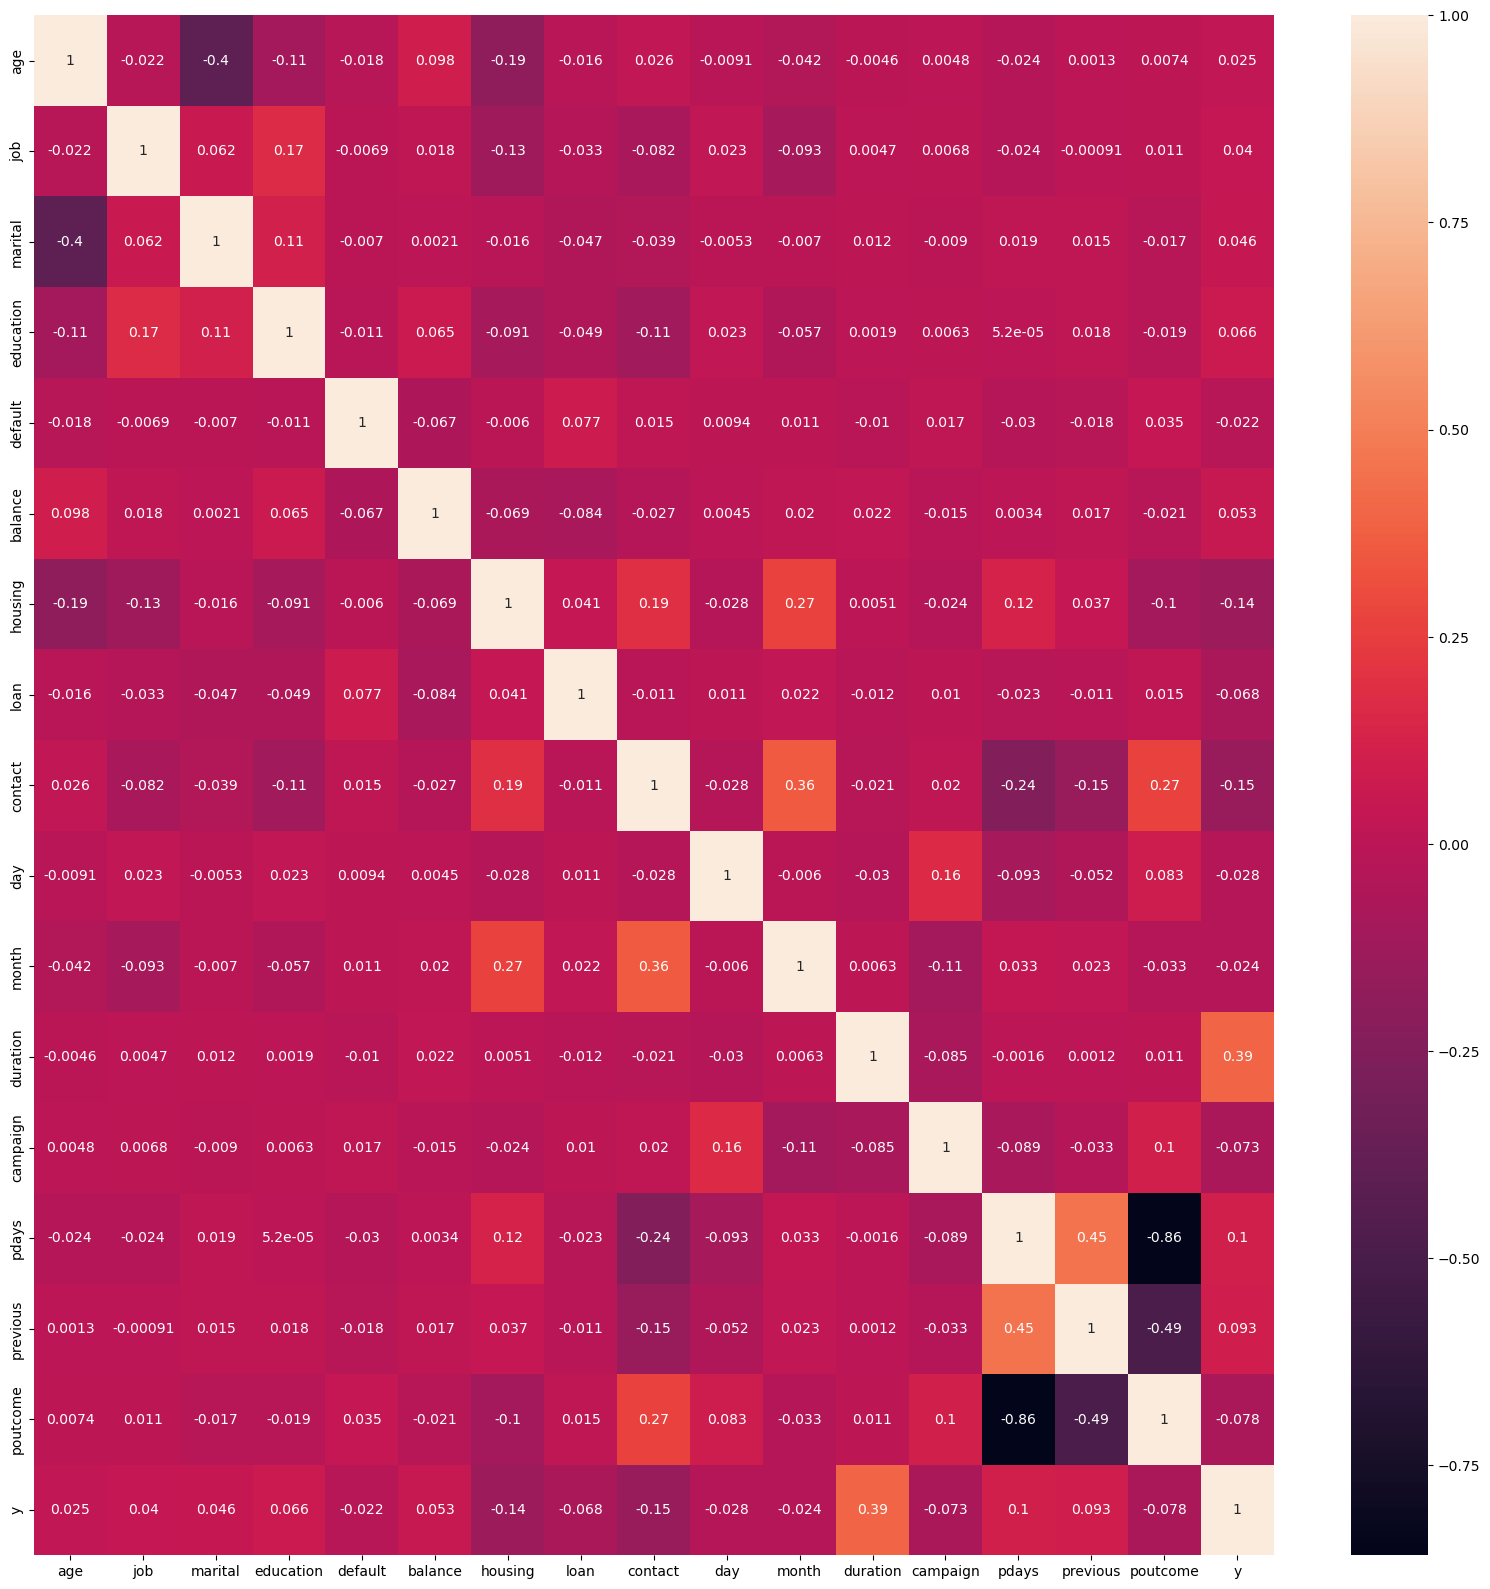

In [222]:
#create a correlation matrix with the bank_clean data
corr = bank_clean.corr()
#plot the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()


#Loan success by marketing campaign outcome

The definitions of the marketing campaign outcomes were undefined, other than the supply of the four values: unknown, failure, other, and success.  While there is a strong correlation between the successful loans (individuals who accepted the terms of deposit), there were customers who accepted the loan terms without being classified as part of a successful campaigns.

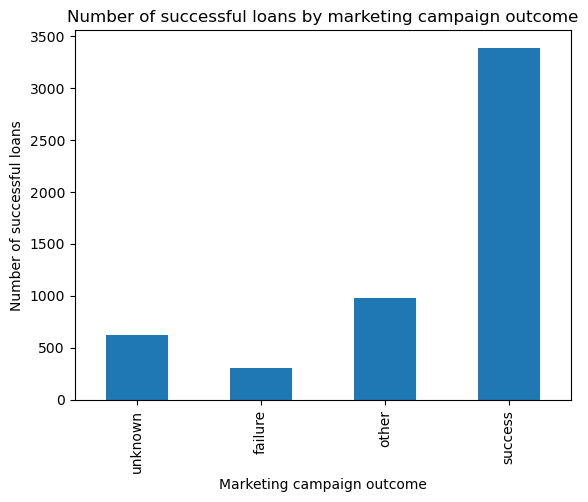

In [223]:
#based on the above correlation matrix, there appears to be a correlation between the marketing campaign outcomes and the number of successful loans
#this simple plot show the count of successful loans by marketing campaign outcome
bank_clean.groupby('poutcome').sum()['y'].plot(kind='bar')
plt.xticks([0,1,2,3], ['unknown', 'failure', 'other', 'success'])
plt.title('Number of successful loans by marketing campaign outcome')
plt.xlabel('Marketing campaign outcome')
plt.ylabel('Number of successful loans')
plt.show()


#Combining marketing campaign data

I cleaned the data one step further by grouping any of the marketing data that was not success.  Unknown, failure and other became "failure or other".  After considering these results, I cleaned the original data one step further by making the Marketing campaign outcome boolean, success = 1, not successful =0.

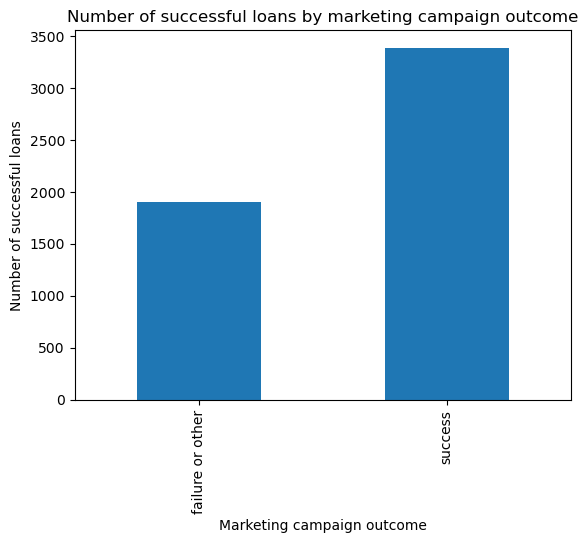

In [224]:
#create the same bar chart but combine poutcomes with values of unknown, failire and other
bank_clean_grouped = bank_clean.copy()
#replace poutcome values of unknown, failure and other in bank_clean_grouped with "failure or other"
bank_clean_grouped['poutcome'] = bank_clean_grouped['poutcome'].replace([0, 1, 2], 1)
bank_clean_grouped.groupby('poutcome').sum()['y'].plot(kind='bar')
plt.xticks([0,1], ['failure or other', 'success'])
plt.title('Number of successful loans by marketing campaign outcome')
plt.xlabel('Marketing campaign outcome')
plt.ylabel('Number of successful loans')
plt.show()


In [225]:
#replacing the poutcome values with boolean values, 1= success, 0= non a success
bank_clean['poutcome'] = bank_clean['poutcome'].replace([0, 1, 2], 0)
bank_clean['poutcome'] = bank_clean['poutcome'].replace(3, 1)
bank_clean.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,1,0


In [226]:
#repeating the process for the sample data
bank_clean_sample['poutcome'] = bank_clean_sample['poutcome'].replace([0, 1, 2], 0)
bank_clean_sample['poutcome'] = bank_clean_sample['poutcome'].replace(3, 1)
bank_clean_sample.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,1,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,1,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,1,0
